## Homework

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_file = '../data/airbnb_data.csv'

df = pd.read_csv(data_file)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Exploratory Data Analysis

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Does 'price' has a long tail?

In [4]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

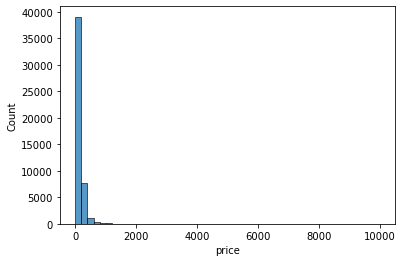

In [5]:
sns.histplot(df.price, bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

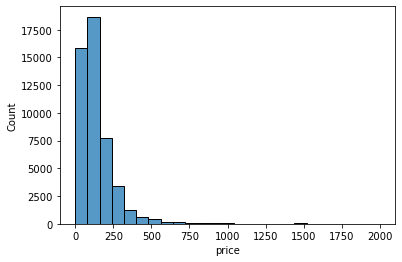

In [6]:
sns.histplot(df.price[df.price < 2000], bins=25)

In [7]:
df = df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price']]

### Question 1
Find a feature with missing values. How many missing values does it have?

In [8]:
df.isnull().sum()

latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

**Answer:** 'reviews_per_month' with 10052 missing values.

### Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [9]:
df.minimum_nights.median()

3.0

### Data Sets

In [10]:
def generate_data_sets(df, perc_val=0.2, perc_test=0.2):
    df = df.copy()
    
    n = len(df)
    n_val = int(n * perc_val)
    n_test = int(n * perc_test)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True) 
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    
    return df_train, df_val, df_test
 

In [11]:
np.random.seed(42)
df_train, df_val, df_test = generate_data_sets(df)

In [12]:
df_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,40.64354,-73.97777,3,62,0.71,1,189,89
1,40.70666,-73.90779,21,0,NaN,1,73,30
2,40.76116,-73.99016,2,17,0.43,1,0,120
3,40.70763,-74.01050,2,5,1.88,327,272,470
4,40.79658,-73.93287,2,30,0.80,1,30,199


In [13]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

### Question 3
Handling of missing values...
- Fill with 0
- Fill with the mean price

In [14]:
def train_linear_regression(X, y):
    # add 1 for the intercept
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def prepare_X(df, missing_val):
    df = df.copy()
    return df.fillna(missing_val).values


In [15]:
X_train1 = prepare_X(df_train, 0)
w1_0, w1 = train_linear_regression(X_train1, y_train)

In [16]:
mean_reviews = df_train.reviews_per_month.mean()
mean_reviews

X_train2 = prepare_X(df_train, mean_reviews)
w2_0, w2 = train_linear_regression(X_train2, y_train)

In [17]:
X_val1 = prepare_X(df_val, 0)
y_pred1 = w1_0 + X_val1.dot(w1)
round(rmse(y_val, y_pred1), 2)

0.64

In [18]:
X_val2 = prepare_X(df_val, mean_reviews)
y_pred2 = w2_0 + X_val2.dot(w2)
round(rmse(y_val, y_pred2), 2)

0.64

### Question 4
Train a regularized linear regression...

In [19]:
def train_linear_regression_reg(X, y, r=0.001):
    # add 1 for the intercept
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [20]:
X_train = X_train1
X_val = X_val1

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, "->", round(score, 2))

0 -> 0.64
1e-06 -> 0.64
0.0001 -> 0.64
0.001 -> 0.64
0.01 -> 0.66
0.1 -> 0.68
1 -> 0.68
5 -> 0.68
10 -> 0.68


### Question 5
Different seeds....

In [21]:
res = np.zeros(10)
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    df_train, df_val, df_test = generate_data_sets(df)

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    res[seed] = round(rmse(y_val, y_pred), 2)
    
    print(seed, res[seed])
    
std = np.std(res)
round(std, 3)

0 0.65
1 0.65
2 0.65
3 0.64
4 0.64
5 0.63
6 0.63
7 0.65
8 0.65
9 0.64


0.008

### Question 6

In [22]:
seed = 9
np.random.seed(seed)

df_train, df_val, df_test = generate_data_sets(df)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

In [23]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
X_full_train = prepare_X(df_full_train, 0)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [24]:
X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score, 2)

0.65